## Case Study: Bellabeat Fitness Tracker
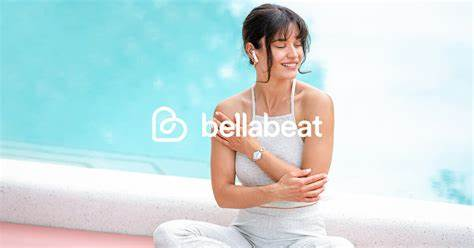


#### Introduction
#### Scenario
You are a junior data analyst working on the marketing analyst team at Bellabeat, a high-tech manufacturer of health-focused products for women. Bellabeat is a successful small company, but they have the potential to become a larger player in the global smart device market. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat, believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. You have been asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights you discover will then help guide marketing strategy for the company. You will present your analysis to the Bellabeat executive team along with your high-level recommendations for Bellabeat’s marketing strategy


#### About the company
Urška Sršen and Sando Mur founded Bellabeat, a high-tech company that manufactures health-focused smart products. Sršen used her background as an artist to develop beautifully designed technology that informs and inspires women around the world. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

By 2016, Bellabeat had opened offices around the world and launched multiple products. Bellabeat products became available through a growing number of online retailers in addition to their own e-commerce channel on their website. The company has invested in traditional advertising media, such as radio, out-of-home billboards, print, and television, but focuses on digital marketing extensively. Bellabeat invests year-round in Google Search, maintaining active Facebook and Instagram pages, and consistently engages consumers on Twitter. Additionally, Bellabeat runs video ads on Youtube and display ads on the Google Display Network to support campaigns around key marketing dates.

Sršen knows that an analysis of Bellabeat’s available consumer data would reveal more opportunities for growth. She has asked the marketing analytics team to focus on a Bellabeat product and analyze smart device usage data in order to gain insight into how people are already using their smart devices. Then, using this information, she would like high-level recommendations for how these trends can inform Bellabeat marketing strategy.


#### Characters and teams
Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer

Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team

Bellabeat marketing analytics team: A team of data analysts responsible for collecting, analyzing, and reporting data that helps guide Bellabeat’s marketing strategy. You joined this team six months ago and have been busy learning about Bellabeat’s mission and business goals — as well as how you, as a junior data analyst, can help Bellabeat achieve them.

#### Products
Bellabeat app: The Bellabeat app provides users with health data related to their activity, sleep, stress, menstrual cycle, and mindfulness habits. This data can help users better understand their current habits and make healthy decisions. The Bellabeat app connects to their line of smart wellness products.

Leaf: Bellabeat’s classic wellness tracker can be worn as a bracelet, necklace, or clip. The Leaf tracker connects to the Bellabeat app to track activity, sleep, and stress.

Time: This wellness watch combines the timeless look of a classic timepiece with smart technology to track user activity, sleep, and stress. The Time watch connects to the Bellabeat app to provide you with insights into your daily wellness.

Spring: This is a water bottle that tracks daily water intake using smart technology to ensure that you are appropriately hydrated throughout the day. The Spring bottle connects to the Bellabeat app to track your hydration levels.

Bellabeat membership: Bellabeat also offers a subscription-based membership program for users. Membership gives users 24/7 access to fully personalized guidance on nutrition, activity, sleep, health and beauty, and mindfulness based on their lifestyle and goals.


### My contributions

**Data sources used:** Collected data of user's daily activity, sleep, calories and weight. 

**Deliveries:**
- Insights of user's data and behavior
- High level customer segmentation analysis of activity and sleep data (segmentation based on average number of daily steps)
- Top high level content recommendations
- PDF containing Tabeau visualizatons of top findings and recommendations

**Limitations**: Data collected from limited timeperiod and OF few users. I will regardless segment the customers into four grous after the number of average steps a day for demonstration and to explore possible user patterns.

### Import and read data

In [2]:
#Import packages
import pandas as pd
import numpy as np
import os 
from datetime import datetime as dt
#from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
import scipy.stats as stats
from scipy.stats import norm

In [3]:
# Custom style and palettes
palette_custom= ['#6d45cc','#45ccb0', '#a4cc45', '#cc4560'] 
palette_custom1= ['#6d45cc','#cc4560','#45ccb0'] 
plt.style.use('ggplot')

In [4]:
# Read tables daily activity, sleep + weight 
daily_activity = pd.read_csv(r"C:\Users\Tori\Downloads\fitness\mturkfitbit_export_4.12.16-5.12.16\fitabase_data\files_sql_used\dailyActivity_merged.csv")
sleep_day = pd.read_csv(r"C:\Users\Tori\Downloads\fitness\mturkfitbit_export_4.12.16-5.12.16\fitabase_data\files_sql_used\sleepDay_merged.csv")
weight_log = pd.read_csv(r"C:\Users\Tori\Downloads\fitness\mturkfitbit_export_4.12.16-5.12.16\fitabase_data\files_sql_used\weightLogInfo_merged.csv")

## 1. Standardize, manipulate and filter data

In [5]:
# View all columns in tables
print('-Daily_activity:',"\n".join(daily_activity.columns),"\n Number of unique IDs:", daily_activity['Id'].nunique(), "\n")
print('-Sleep_day', "\n".join(sleep_day.columns), "\n Number of unique IDs:", sleep_day['Id'].nunique(),"\n") 
print('-Weight_log', "\n".join(weight_log.columns),"\n Number of unique IDs:", weight_log['Id'].nunique(),"\n")

-Daily_activity: Id
ActivityDate
TotalSteps
TotalDistance
TrackerDistance
LoggedActivitiesDistance
VeryActiveDistance
ModeratelyActiveDistance
LightActiveDistance
SedentaryActiveDistance
VeryActiveMinutes
FairlyActiveMinutes
LightlyActiveMinutes
SedentaryMinutes
Calories 
 Number of unique IDs: 33 

-Sleep_day Id
SleepDay
TotalSleepRecords
TotalMinutesAsleep
TotalTimeInBed 
 Number of unique IDs: 24 

-Weight_log Id
Date
WeightKg
WeightPounds
Fat
BMI
IsManualReport
LogId 
 Number of unique IDs: 8 



In [6]:
 # Check for missing values
missing_values = {
    "daily_activity": daily_activity.isna().sum(),
    "sleep_day": sleep_day.isna().sum(),
    "weight_log": weight_log.isna().sum(),
}

# Create dataframe to show missing values
missing_values_df = pd.DataFrame(missing_values)
missing_values_df

,daily_activity,sleep_day,weight_log
ActivityDate,0.0,NaN,NaN
BMI,NaN,NaN,0.0
Calories,0.0,NaN,NaN
Date,NaN,NaN,0.0
FairlyActiveMinutes,0.0,NaN,NaN
Fat,NaN,NaN,65.0
Id,0.0,0.0,0.0
IsManualReport,NaN,NaN,0.0
LightActiveDistance,0.0,NaN,NaN
LightlyActiveMinutes,0.0,NaN,NaN


In [7]:
# Checking for duplicate records in each dataset
duplicate_counts = {
    "daily_activity": daily_activity.duplicated().sum(),
    "sleep_day": sleep_day.duplicated().sum(),
    "weight_log": weight_log.duplicated().sum()
}

duplicate_counts = pd.DataFrame(duplicate_counts, index=["Duplicates"])
duplicate_counts

,daily_activity,sleep_day,weight_log
Duplicates,0,3,0


In [8]:
# Finding and showing all duplicated rows in "sleep_day"
duplicated_sleep_day_rows = sleep_day[sleep_day.duplicated(keep=False)]
duplicated_sleep_day_rows

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
160,4388161847,5/5/2016 12:00:00 AM,1,471,495
161,4388161847,5/5/2016 12:00:00 AM,1,471,495
222,4702921684,5/7/2016 12:00:00 AM,1,520,543
223,4702921684,5/7/2016 12:00:00 AM,1,520,543
379,8378563200,4/25/2016 12:00:00 AM,1,388,402
380,8378563200,4/25/2016 12:00:00 AM,1,388,402


In [9]:
# Removing duplicate records from the slee_day table
sleep_day = sleep_day.drop_duplicates()

In [10]:
# Make an overview of all data types in tables
dtypes = {
    "daily_activity": daily_activity.dtypes,
    "sleep_day": sleep_day.dtypes,
    "weight_log": weight_log.dtypes
}
    

dtypes_df = pd.DataFrame(dtypes)
dtypes_df

,daily_activity,sleep_day,weight_log
ActivityDate,object,NaN,NaN
BMI,NaN,NaN,float64
Calories,int64,NaN,NaN
Date,NaN,NaN,object
FairlyActiveMinutes,int64,NaN,NaN
Fat,NaN,NaN,float64
Id,int64,int64,int64
IsManualReport,NaN,NaN,bool
LightActiveDistance,float64,NaN,NaN
LightlyActiveMinutes,int64,NaN,NaN


In [11]:
# Format date columns
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'], format='%m/%d/%Y')
daily_activity.rename(columns={'ActivityDate': 'date'}, inplace=True)

sleep_day['SleepDay'] = pd.to_datetime(sleep_day['SleepDay'], errors='coerce')
sleep_day['date'] = sleep_day['SleepDay'].dt.strftime('%m/%d/%Y') 
sleep_day['time'] = sleep_day['SleepDay'].dt.time 
sleep_day['date'] = pd.to_datetime(sleep_day['date'], errors='coerce')

In [12]:
weight_log['Date'] = pd.to_datetime(weight_log['Date'], errors='coerce')
weight_log['date'] = weight_log['Date'].dt.strftime('%m/%d/%Y')  
weight_log['time'] = weight_log['Date'].dt.strftime('%H:%M:%S')   
weight_log['date'] = pd.to_datetime(weight_log['date'], errors='coerce')

In [13]:
daily_activity.dtypes
sleep_day.dtypes
weight_log.dtypes


Id                         int64
Date              datetime64[ns]
WeightKg                 float64
WeightPounds             float64
Fat                      float64
BMI                      float64
IsManualReport              bool
LogId                      int64
date              datetime64[ns]
time                      object
dtype: object

In [14]:
# Check timeframe for collected data
print(daily_activity['date'].min(), daily_activity['date'].max())

2016-04-12 00:00:00 2016-05-12 00:00:00


In [15]:
# Find if "total distance" and "tracker distance" columns are the same
columns_equal = (daily_activity['TotalDistance'] == daily_activity['TrackerDistance']).all()
columns_equal

False

In [16]:
#dg = sleep_day['date'].sort_values(ascending = False).reset_index()

In [17]:
# View columns, "daily activity"
daily_activity.columns

Index(['Id', 'date', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [18]:
# Format column headings to all small letters
daily_activity.columns = daily_activity.columns.str.lower()
daily_activity.columns

Index(['id', 'date', 'totalsteps', 'totaldistance', 'trackerdistance',
       'loggedactivitiesdistance', 'veryactivedistance',
       'moderatelyactivedistance', 'lightactivedistance',
       'sedentaryactivedistance', 'veryactiveminutes', 'fairlyactiveminutes',
       'lightlyactiveminutes', 'sedentaryminutes', 'calories'],
      dtype='object')

In [19]:
# Rename columns
daily_activity = daily_activity.rename(columns={'Id':'id','totalsteps': 'total_steps', 'totaldistance': 'total_distance', 
     'veryactivedistance': 'very_active_distance',
       'moderatelyactivedistance':'moderately_active_distance', 'lightactivedistance': 'light_active_distance',
       'sedentaryactivedistance':'sedentary_active_distance', 'veryactiveminutes': 'very_active_minutes', 'fairlyactiveminutes': 'fairly_active_minutes',
       'lightlyactiveminutes':'lightly_active_minutes', 'sedentaryminutes': 'sedentary_minutes'})
daily_activity.columns

Index(['id', 'date', 'total_steps', 'total_distance', 'trackerdistance',
       'loggedactivitiesdistance', 'very_active_distance',
       'moderately_active_distance', 'light_active_distance',
       'sedentary_active_distance', 'very_active_minutes',
       'fairly_active_minutes', 'lightly_active_minutes', 'sedentary_minutes',
       'calories'],
      dtype='object')

In [20]:
# Create new column showing total logged hours
daily_activity['total_hours'] = (daily_activity['very_active_minutes']+ daily_activity['fairly_active_minutes']+
       daily_activity['lightly_active_minutes'] + daily_activity['sedentary_minutes'])/60

In [21]:
# Create new column showing total active hours
daily_activity['total_active_hours'] = (daily_activity['very_active_minutes']+ daily_activity['fairly_active_minutes']+
       daily_activity['lightly_active_minutes'] )/60

In [22]:
# Create new column showing total sednetary hours
daily_activity["sedentary_hours"] = daily_activity["sedentary_minutes"]/60

In [23]:
# Change "sleep_day" column names to lower case
sleep_day.columns = sleep_day.columns.str.lower()
sleep_day.columns

Index(['id', 'sleepday', 'totalsleeprecords', 'totalminutesasleep',
       'totaltimeinbed', 'date', 'time'],
      dtype='object')

In [24]:
# Rename columns
sleep_day = sleep_day.rename(columns={'totalsleeprecords': 'total_sleep_records', 'totalminutesasleep':'tot_min_asleep', 'totaltimeinbed':'tot_time_in_bed'})
sleep_day.columns

Index(['id', 'sleepday', 'total_sleep_records', 'tot_min_asleep',
       'tot_time_in_bed', 'date', 'time'],
      dtype='object')

In [25]:
# Create new column with hours in bed and asleep
sleep_day['total_hours_asleep'] = (sleep_day['tot_min_asleep']/60)
sleep_day['total_hours_in_bed'] = (sleep_day['tot_time_in_bed']/60)

In [26]:
# Rename columns
sleep_day = sleep_day.rename(columns={'totalsleeprecords': 'total_sleep_records', 'totalminutesasleep':'tot_min_asleep', 'totaltimeinbed':'tot_time_in_bed'})
sleep_day.columns

Index(['id', 'sleepday', 'total_sleep_records', 'tot_min_asleep',
       'tot_time_in_bed', 'date', 'time', 'total_hours_asleep',
       'total_hours_in_bed'],
      dtype='object')

In [27]:
# Create new column displaying numerical weekdays, 
#daily_activity['day_of_week_num'] = daily_activity['date'].dt.weekday #Monday=0

# Create new column displaying weekdays with name
daily_activity['day_of_week_name'] = daily_activity['date'].dt.day_name()

order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

### View and filter data

I chose to filter out all rows with measuarement metrics that are either 0, or otherwise unlikely a part of the natural variation within the dataset. Another option is to calculate new entries from the existing data and keep all the rows. Outliers in the upper scale are left as natural variation within the data.

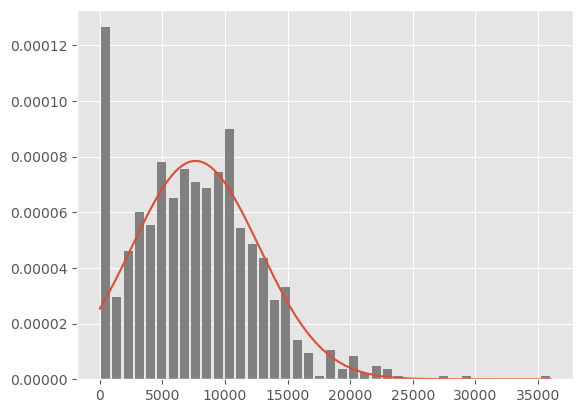

In [28]:
#Visualise "total daily steps" in daily activity" 

#sns.histplot(data = daily_activity, x = 'total_steps', bins = 40)
plt.hist(daily_activity.total_steps, bins = 40, rwidth = 0.8, density = True, color = 'gray')
rng = np.arange(daily_activity.total_steps.min(), daily_activity.total_steps.max(), 0.1)
plt.plot(rng, norm.pdf(rng,daily_activity.total_steps.mean(),daily_activity.total_steps.std()))
plt.show()

There are a many entries with 0 daily steps in the data. I choose to filter these out.

In [29]:
# Find number of entries with 0 step count
daily_activity.total_steps.loc[daily_activity['total_steps'] ==0].count()

77

In [30]:
# Removing the 0 step counts enteries from dataset
daily_activity_filtered = daily_activity.query('total_steps > 0').reset_index(drop=True)

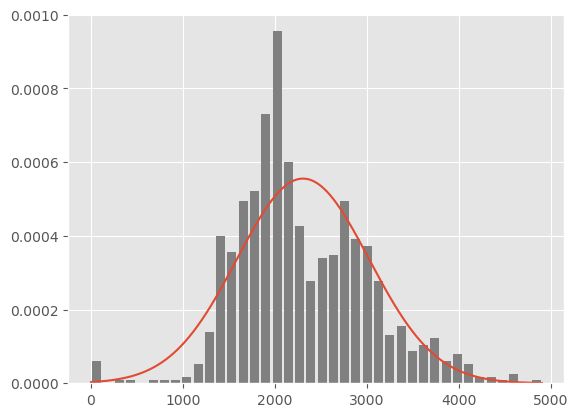

In [31]:
#Visualise "daily consumed calories" in "daily activity" 
plt.hist(daily_activity.calories, bins = 40, rwidth = 0.8, density = True , color = 'gray')
rng = np.arange(daily_activity.calories.min(), daily_activity.calories.max(), 0.1)
plt.plot(rng, norm.pdf(rng,daily_activity.calories.mean(),daily_activity.calories.std()))
plt.show()

I filter out the entries with less than 1000 calories burned a day. I leave the rest to display natural variation within the caloric data. 

In [32]:
# Find number of entries with less than 1000 calories burned 
daily_activity.calories.loc[daily_activity['calories'] <1000].count()

12

In [33]:
# Removing the enteries from dataset
daily_activity_filtered = daily_activity_filtered.query('calories > 1000').reset_index(drop=True)

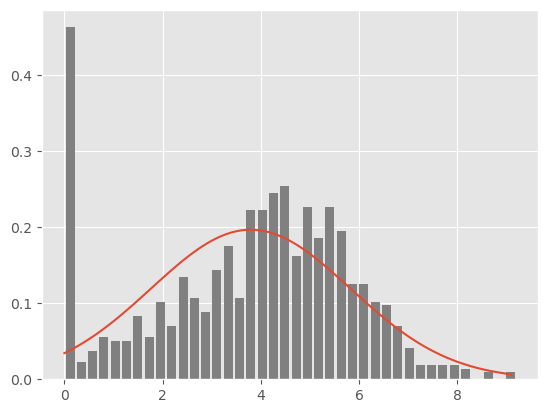

In [34]:
# Visualise total active hours
plt.hist(daily_activity.total_active_hours, bins = 40, rwidth = 0.8, density = True, color = 'gray' )
rng = np.arange(daily_activity.total_active_hours.min(), daily_activity.total_active_hours.max(), 0.1)
plt.plot(rng, norm.pdf(rng,daily_activity.total_active_hours.mean(),daily_activity.total_active_hours.std()))
plt.show()

In [35]:
# Find number of entries with 0 active hours
daily_activity.total_active_hours.loc[daily_activity['total_active_hours'] ==0].count()

83

The high number of none active hours seems odd compare to the rest of the data. 
Let's check the number of sedentary hours:

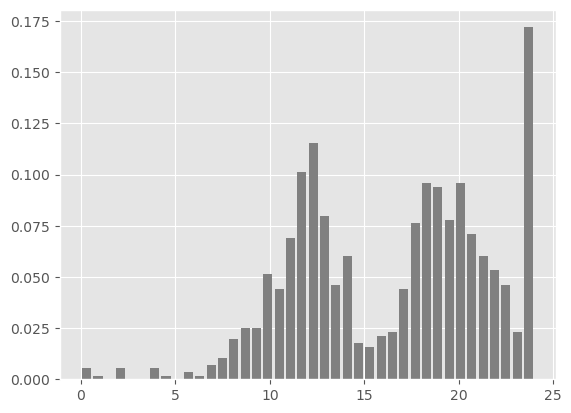

In [36]:
# Visualize sedentary hours
plt.hist(daily_activity.sedentary_hours, bins = 40, rwidth = 0.8, density = True, color = 'gray')
rng = np.arange(daily_activity.sedentary_hours.min(), daily_activity.sedentary_hours.max(), 0.1)
#plt.plot(rng, norm.pdf(rng,daily_activity.sedentary_hours.mean(),daily_activity.sedentary_hours.std()))
plt.show()
# Bimodal distribution

In [37]:
# Find number of entries with 0 active hours
daily_activity.sedentary_hours.loc[daily_activity['sedentary_hours'] ==24].count()

79

The high number of sedentry hours is likely due to missing tracking. 

In [38]:
# Removing the enteries from new dataframe
daily_activity_time_filtered = daily_activity_filtered.query('total_active_hours != 0').reset_index(drop=True)
daily_activity_time_filtered = daily_activity_filtered.query('sedentary_hours != 24').reset_index(drop=True)

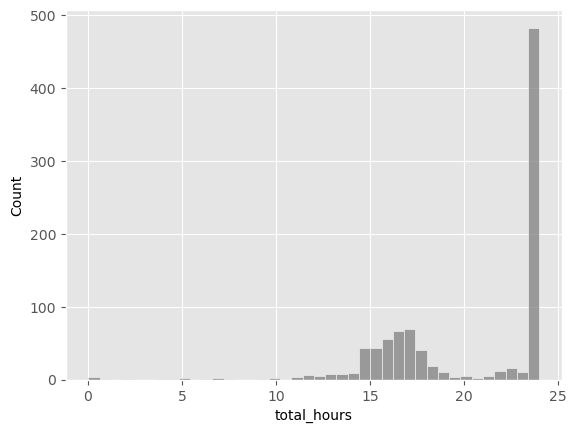

In [39]:
#Visualise "total_hours asleep" in "sleep day" 
sns.histplot(data = daily_activity, x = 'total_hours', bins = 40, color = 'gray')
plt.show()

I filter out entries with less than 10 hours of tracking to display a more realistic image of the user's daily activity.

In [40]:
# Find number of entries with less than 10 hours of use count
daily_activity.total_hours.loc[daily_activity['total_hours'] <10].count()

15

In [41]:
# Removing the enteries from dataset
daily_activity_filtered = daily_activity_filtered.query('total_hours > 10').reset_index(drop=True)

In [42]:
# How many rows were removed fro table?
print("Number of rows removed from daily activity:",len(daily_activity) -len(daily_activity_filtered), "out of", len(daily_activity) )

Number of rows removed from daily activity: 90 out of 940


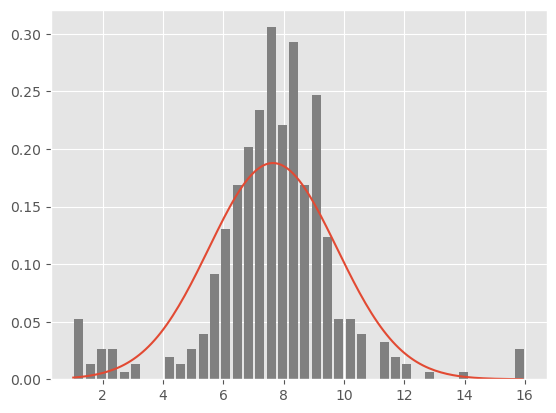

In [43]:
#sns.histplot(data = sleep_day, x = 'tot_min_asleep', bins = 40)
plt.hist(sleep_day.total_hours_in_bed, bins = 40, rwidth = 0.8, density = True, color = 'gray')
rng = np.arange(sleep_day.total_hours_in_bed.min(), sleep_day.total_hours_in_bed.max(), 0.1)
plt.plot(rng, norm.pdf(rng, sleep_day.total_hours_in_bed.mean(),sleep_day.total_hours_in_bed.std()))
plt.show()

In [44]:
# Print max and min hous a sleep in the data
print('min:', sleep_day.total_hours_in_bed.min())
print('max:', sleep_day.total_hours_in_bed.max())

min: 1.0166666666666666
max: 16.016666666666666


I filter out all entries with less than 4 hours in bed a day, as this is likely not natural variation within the data, but error in tracking. 

In [45]:
# Find number of entries with less than 4 hours in bed
sleep_day.total_hours_in_bed.loc[sleep_day['total_hours_in_bed'] <4].count()

21

In [46]:
# Removing the enteries from dataset
sleep_day_filtered = sleep_day.query('tot_min_asleep > 200').reset_index(drop=True)

### Group users according to average daily step count

# Group the data by the id

In [47]:
id_group = daily_activity_filtered.groupby('id')['total_steps'].mean()

id_average_steps = pd.DataFrame(id_group)

In [48]:
len(id_average_steps) 
# Check the number of id's in filtered frame.

33

In [49]:
# Create a new column which shows which category each user fits into, depending on the average amount of steps
conditions = [
    (id_average_steps < 5000),
    (id_average_steps >= 5000) & (id_average_steps < 8000),
    (id_average_steps >=8000) & (id_average_steps < 11000),
    (id_average_steps >=11000)
] 

values = ['sedentary','fairly_active','moderately_active','very_active'] # names of the values


#  Assign each id a category
id_average_steps['user_activity_level'] = np.select(conditions,values)

# Store the results in a variable
id_activity_level = id_average_steps['user_activity_level']

# I use a list comprehension to create the column in ther original dataset.
# With this list comprehension I retrieve the categories where the index match the id column
daily_activity_filtered['user_activity_level'] = [id_activity_level[c] for c in daily_activity_filtered['id']]

In [50]:
# View table
daily_activity_filtered.head()

,id,date,total_steps,total_distance,trackerdistance,loggedactivitiesdistance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,fairly_active_minutes,lightly_active_minutes,sedentary_minutes,calories,total_hours,total_active_hours,sedentary_hours,day_of_week_name,user_activity_level
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,18.233333,6.100000,12.133333,Tuesday,very_active
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,17.216667,4.283333,12.933333,Wednesday,very_active
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,24.000000,3.700000,20.300000,Thursday,very_active
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,16.633333,4.533333,12.100000,Friday,very_active
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,17.333333,4.450000,12.883333,Saturday,very_active


## 2.  Merge tables

In [51]:
# Merging the activity and sleep tables
activity_sleep_merged = pd.merge(daily_activity_filtered , sleep_day_filtered, how='inner', on=['id', 'date'])
# Checking number of rows lost from sleep data in total : 
print(len(sleep_day) - len(activity_sleep_merged))

34


In [52]:
#print(activity_sleep_merged['id'].value_counts())
#print('mean:', activity_sleep_merged['id'].value_counts().mean())

In [53]:
activity_sleep_merged.head()

,id,date,total_steps,total_distance,trackerdistance,loggedactivitiesdistance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,...,sedentary_hours,day_of_week_name,user_activity_level,sleepday,total_sleep_records,tot_min_asleep,tot_time_in_bed,time,total_hours_asleep,total_hours_in_bed
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,12.133333,Tuesday,very_active,2016-04-12,1,327,346,00:00:00,5.450000,5.766667
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,12.933333,Wednesday,very_active,2016-04-13,2,384,407,00:00:00,6.400000,6.783333
2,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,12.100000,Friday,very_active,2016-04-15,1,412,442,00:00:00,6.866667,7.366667
3,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,12.883333,Saturday,very_active,2016-04-16,2,340,367,00:00:00,5.666667,6.116667
4,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,...,8.983333,Sunday,very_active,2016-04-17,1,700,712,00:00:00,11.666667,11.866667


## 3.Visualize and  Analyze the Data

### Weight Log

In [54]:
weight_log.Id.nunique() # How many unique users logged their weight?

8

In [55]:
# Look at weight data stats
id_BMI = weight_log.groupby('Id')
id_BMI = id_BMI.mean(numeric_only=True)
id_BMI.describe()

,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
count,8.000000,8.000000,2.00000,8.000000,8.000000,8.000000e+00
mean,77.811146,171.544212,23.50000,27.988011,0.625000,1.461628e+12
std,26.051549,57.433835,2.12132,8.236066,0.517549,6.210512e+08
min,52.599998,115.963147,22.00000,21.570001,0.000000,1.460510e+12
25%,60.415000,133.192276,22.75000,23.683500,0.000000,1.461475e+12
50%,70.995001,156.517185,23.50000,26.350542,1.000000,1.461757e+12
75%,86.534375,190.775641,24.25000,27.561250,1.000000,1.462028e+12
max,133.500000,294.317120,25.00000,47.540001,1.000000,1.462277e+12


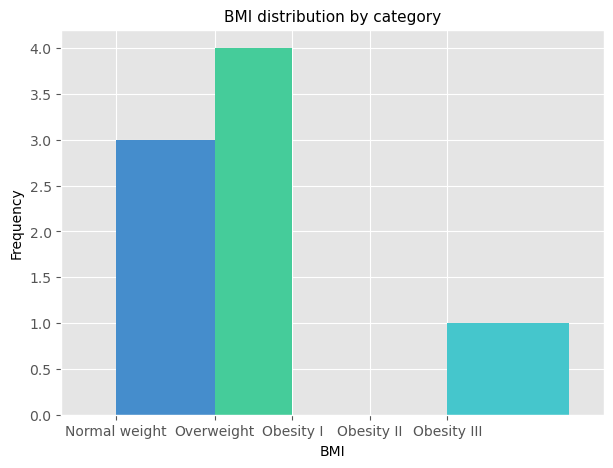

In [56]:
# Visualize the weight distribution amoung the eight users to get an idea of the user group's weight range
bmi_values = id_BMI['BMI']  
max_bmi_value = bmi_values.max()
bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, max_bmi_value + 0.2]  # customizing bmi chart
# Corresponding colors for each BMI category
colors = ['#1f77b4',  # Underweight 
          '#458dcc',  # Normal weight
          '#45cc9a',  # Overweight
          '#d62728',  # Obesity class I
          '#9467bd',  # Obesity class II
          '#45c6cc']  # Obesity class III

plt.figure(figsize=(7, 5))

# Plot as a histogram 
n, bins, patches = plt.hist(bmi_values, bins=bins)

# Color code each category
for patch, color in zip(patches, colors):
    plt.setp(patch, 'facecolor', color)
# Custom:
plt.title('BMI distribution by category', size = 11)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.xticks(bins[:-1], labels=['Underweight', 'Normal weight', 'Overweight', 'Obesity I', 'Obesity II', 'Obesity III'])
plt.xlim(15, 50)
plt.show()


In [57]:
# How many times were the weight logged among the users?
weight_log.Id.value_counts()

6962181067    30
8877689391    24
4558609924     5
1503960366     2
2873212765     2
4319703577     2
1927972279     1
5577150313     1
Name: Id, dtype: int64

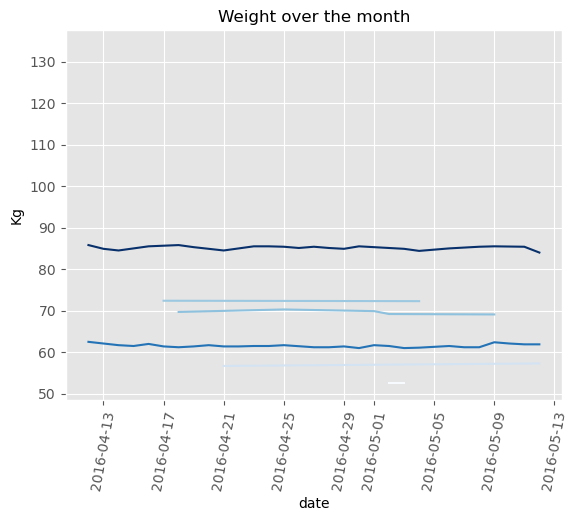

In [58]:
# View weight timeline
sns.lineplot(weight_log, y = 'WeightKg', x ='date', hue = 'Id', legend = False, palette = 'Blues')
plt.xticks(rotation=80) 
plt.ylabel('Kg')
plt.title('Weight over the month', size = 12)
plt.show()

**Findings:**
Only 8 out of 33 users (24%) logged their weight data, and only two out of these logged throughout the whole month. The user's BMI ranged from  21.5 (normal) to 47.5 (obese), with the median of users being in the upper scale of what is considered normal BMI. No noticable weight loss or gain were obeserved among those who tracked their weight. 

##  Daily Activity and Sleep

In [59]:
# How many unique users tracked their daily activity?
average_steps = daily_activity.groupby('id')['total_steps'].mean()
daily_activity['average_steps'] = average_steps
daily_activity.id.nunique()

33

In [60]:
activity_sleep_merged.describe()

,id,total_steps,total_distance,trackerdistance,loggedactivitiesdistance,very_active_distance,moderately_active_distance,light_active_distance,sedentary_active_distance,very_active_minutes,...,sedentary_minutes,calories,total_hours,total_active_hours,sedentary_hours,total_sleep_records,tot_min_asleep,tot_time_in_bed,total_hours_asleep,total_hours_in_bed
count,3.760000e+02,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,...,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000,376.000000
mean,5.029396e+09,8744.630319,6.167686,6.162207,0.118712,1.495798,0.762527,3.881410,0.001011,25.936170,...,706.127660,2420.351064,16.198183,4.429388,11.768794,1.125000,435.324468,475.648936,7.255408,7.927482
std,2.080901e+09,4021.719877,2.940533,2.935554,0.526832,1.963639,1.001433,1.651664,0.009065,36.739532,...,116.713711,739.184819,1.591901,1.445384,1.945229,0.354495,92.023829,96.187035,1.533730,1.603117
min,1.503960e+09,254.000000,0.160000,0.160000,0.000000,0.000000,0.000000,0.160000,0.000000,0.000000,...,330.000000,1141.000000,11.116667,0.283333,5.500000,1.000000,213.000000,248.000000,3.550000,4.133333
25%,3.977334e+09,5629.750000,3.797500,3.797500,0.000000,0.000000,0.000000,2.650000,0.000000,0.000000,...,636.250000,1867.500000,15.179167,3.629167,10.604167,1.000000,377.000000,414.750000,6.283333,6.912500
50%,4.702922e+09,9136.000000,6.445000,6.445000,0.000000,0.670000,0.440000,3.790000,0.000000,11.000000,...,715.000000,2220.500000,16.358333,4.441667,11.916667,1.000000,439.000000,468.000000,7.316667,7.800000
75%,6.962181e+09,11420.000000,8.062500,8.052500,0.000000,2.487500,1.052500,5.032500,0.000000,38.250000,...,773.000000,2924.500000,17.237500,5.287500,12.883333,1.000000,494.000000,531.000000,8.233333,8.850000
max,8.792010e+09,22770.000000,17.540001,17.540001,4.081692,12.540000,6.480000,9.480000,0.110000,210.000000,...,1058.000000,4900.000000,20.833333,9.000000,17.633333,3.000000,796.000000,961.000000,13.266667,16.016667


#### How many days and hours pr. day throughout the month did the users use the activity tracker?

In [61]:
daily_activity_sum = daily_activity.id.value_counts() # Not using the filtered data here
print(daily_activity_sum)

1503960366    31
4319703577    31
8583815059    31
8378563200    31
8053475328    31
7086361926    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
1624580081    31
4388161847    31
4445114986    31
8877689391    31
1927972279    31
2873212765    31
2320127002    31
4020332650    31
2026352035    31
1844505072    31
2022484408    31
3977333714    30
1644430081    30
5577150313    30
8792009665    29
6290855005    29
6117666160    28
6775888955    26
7007744171    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: id, dtype: int64


In [62]:
print('Mean hours of  a day:', daily_activity['total_hours'].mean())

Mean hours of  a day: 20.31255319148936


The users were tracking their daily activity on average 28 days out of 31 days. One user tracked only 4 days.

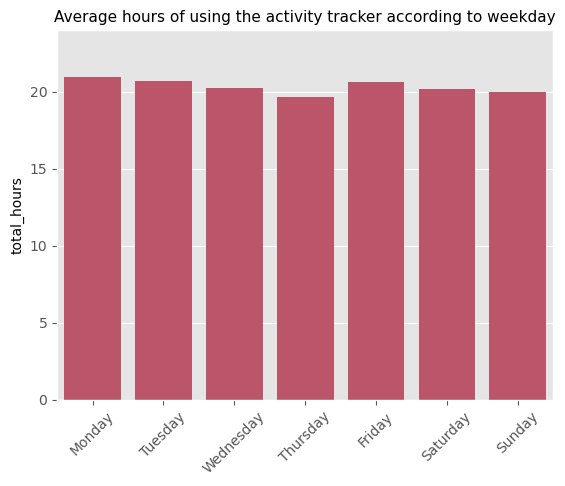

In [63]:
# Visualize the average hours the users are using th tracker per weekday
ax =sns.barplot(daily_activity, x = 'day_of_week_name', y ='total_hours', errorbar = None, color = '#cc4560', order = order)
# Custom
plt.xticks(rotation = 45)
ax.set_xlabel('')
ax.set_ylim(bottom=0, top=24) 
ax.set_title('Average hours of using the activity tracker according to weekday', size = 11)

plt.show()

In [64]:
print('Mean hours of usage a day:', daily_activity['total_hours'].mean())

Mean hours of usage a day: 20.31255319148936


Daily activity was tracked on average 20 out of 24 hours a day. 

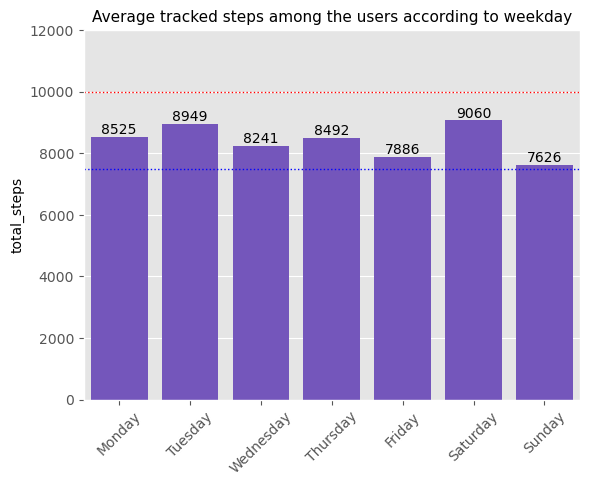

In [65]:
 # Visualize the average tracked steps amoung the users using the filtered dataframe
ax = sns.barplot(data = daily_activity_filtered, x = 'day_of_week_name', y = 'total_steps', errorbar = None ,color = '#6D45CC', order = order)

plt.xticks(rotation=45) 
ax.set_ylim(bottom=0, top=12000) 
ax.axhline(10000, color='red', linewidth=1, linestyle = ':')# Create red line at recommended 10.000 steps
ax.axhline(7500, color='blue', linewidth=1, linestyle = ':')
ax.set_title('Average tracked steps among the users according to weekday', size = 11)
plt.xlabel('')


# Iterate through the bars add number of steps on top of each bar
for p in ax.patches:
    total_steps = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., total_steps, f'{int(total_steps)}', 
            fontsize=10, ha='center', va='bottom')


plt.show()

In [66]:
print('Mean days of usage a month:',daily_activity_sum.mean())

Mean days of usage a month: 28.484848484848484


In [67]:
# Find percentage of users with more than 10.000 steps a day. 
average_steps_per_user = daily_activity_filtered.groupby('id')['total_steps'].mean()

# Filter to find users with more than 10,000 steps
users_above_10000 = average_steps_per_user[average_steps_per_user > 10000]
users_above_10000
# Calculate the percentage
print('Percentage reaching 10.000 steps on average:',100/33 * 7)

Percentage reaching 10.000 steps on average: 21.21212121212121


The mean number of steps a day for the users were 8407 steps, above the threshold(blue line in figure) of minimum recommended steps at 7500, but below the recommendation of 10.000 steps for great fitness (red line in figure), which 21% of the users reached. Most steps were meassured on Saturdays and Tuesdays, and the least on Sundays and Fridays. 

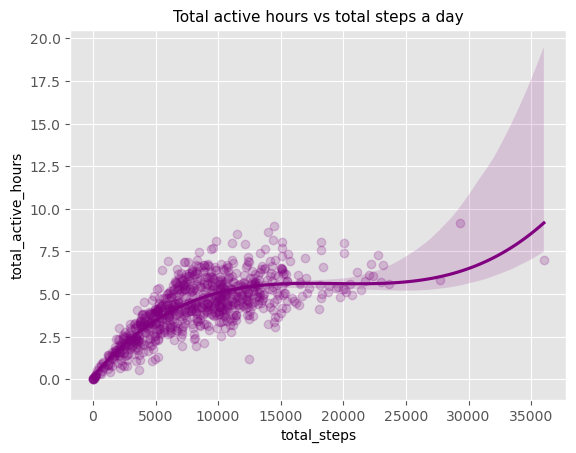

In [68]:
# View correlation between total active hours and total steps a day. (some activties do not track steps such as biking)
ax = sns.regplot(daily_activity_time_filtered, x = 'total_steps', y = 'total_active_hours', order = 3, color = 'purple', scatter_kws={'alpha':0.2})
ax.set_title('Total active hours vs total steps a day', size = 11)
plt.show()

Most of the activity seems to be done by foot, and the higher number of steps done at a higher speed due to less total activity time.

In [69]:
sleep_day.id.nunique() # How many unique users logged their sleep?

24

In [70]:
sleep_day.id.value_counts()

8378563200    31
6962181067    31
5553957443    31
2026352035    28
3977333714    28
4445114986    28
4702921684    27
5577150313    26
4319703577    26
1503960366    25
7086361926    24
4388161847    23
6117666160    18
8792009665    15
2347167796    15
4020332650     8
1927972279     5
4558609924     5
1644430081     4
6775888955     3
8053475328     3
1844505072     3
7007744171     2
2320127002     1
Name: id, dtype: int64

In [71]:
print('Mean nights of sleep tracked a month:',activity_sleep_merged.total_hours_asleep.count()/21)
# not including filtered sleep data

Mean nights of sleep tracked a month: 17.904761904761905


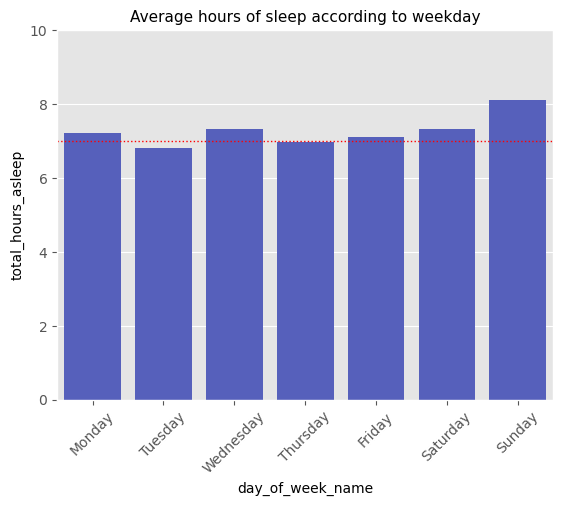

In [72]:
# Create bar plot showing average hours asleep acording to day of week
ax = sns.barplot(data=activity_sleep_merged, y="total_hours_asleep", x="day_of_week_name", errorbar=None, color='#4553cc', order=order)
# Custom
ax.set_ylim(0, 10)  
ax.axhline(7, color='red', linewidth=1, linestyle=':') # Draw red line at recommended 8 hours
ax.set_title('Average hours of sleep according to weekday', size = 11)
plt.xticks(rotation = 45)

plt.show()

In [73]:
print('Mean hours asleep a day:',activity_sleep_merged['total_hours_asleep'].mean())

Mean hours asleep a day: 7.25540780141844


The users reached on average the minimum recommendation for sleep (7 hours a night). However, Tuesdays and Thursdays they slept less than 7 hours. Sundays were the weekday were the users slept the most. 

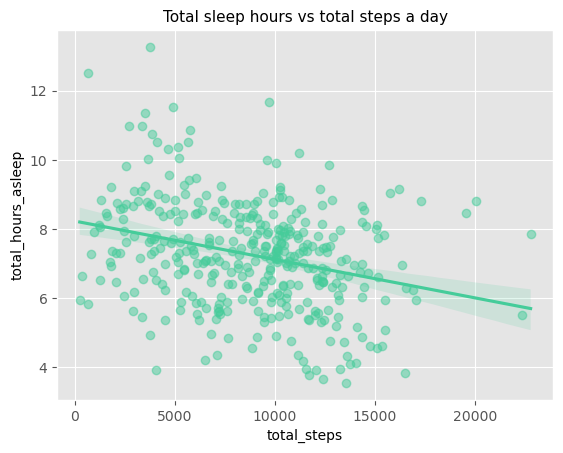

In [74]:
# Visualize correlation between total hours asleep and total steps a day
ax = sns.regplot(activity_sleep_merged, x = 'total_steps', y  = 'total_hours_asleep', order = 1, color = '#45cc9a', scatter_kws={'alpha':0.5})
ax.set_title('Total sleep hours vs total steps a day', size = 11)
plt.show()

In [75]:
# Pearson correlation analysis
correlation, p_value = stats.pearsonr(activity_sleep_merged['total_hours_asleep'], activity_sleep_merged['total_steps'])

print("Pearson correlation coefficient:", correlation)
print("P-value:", p_value)

Pearson correlation coefficient: -0.2914199750544408
P-value: 8.538448431089127e-09


There is a week to moderate negative correlation between total hours of sleep a nigth and total steps taken a day. Hours of sleep alone is not a strong predictor of the amount of daily steps. 
The strong statistical evidence(P-value) suggest that the negative correlation observed is unlikely to be due to random sampling error.

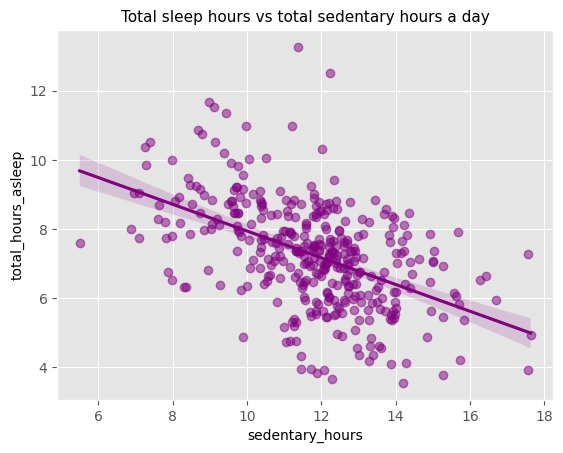

In [78]:
ax = sns.regplot(activity_sleep_merged  , x = 'sedentary_hours', y = 'total_hours_asleep', order = 1, color = 'purple', scatter_kws={'alpha':0.5})
ax.set_title('Total sleep hours vs total sedentary hours a day', size = 11)
plt.show()

In [79]:
# Pearson correlation analysis
correlation, p_value = stats.pearsonr(activity_sleep_merged['total_hours_asleep'], activity_sleep_merged['sedentary_hours'])

print("Pearson correlation coefficient:", correlation)
print("P-value:", p_value)

Pearson correlation coefficient: -0.49031538121898327
P-value: 3.886585929980379e-24


There is a moderate negative correlation between total hours asleep and number of sedentary hours; the more hours slept, the less sedentary hours on average. The moderate correlation suggest that efforts to increase sleep time could have beneficial but not overwhelming effect alone on reducing sedentary hours.  
The moderate negative correlation is statistically significant. 

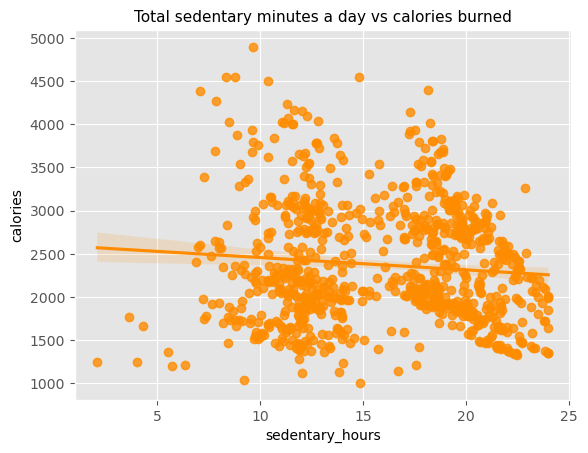

In [80]:
# Plot sedentary minutes a day vs. calories burned.
ax = sns.regplot(daily_activity_time_filtered,  y = 'calories',x = 'sedentary_hours', color = 'darkorange')
plt.title('Total sedentary minutes a day vs calories burned', size = 11)
plt.show()

In [81]:

# Pearson correlation analysis
correlation, p_value = stats.pearsonr(daily_activity_time_filtered['sedentary_hours'], daily_activity_time_filtered['calories'])

print("Pearson correlation coefficient:", correlation)
print("P-value:", p_value)


Pearson correlation coefficient: -0.0933710153375221
P-value: 0.006415296976716283


The correlation is weak (-0.1279) suggesting that while there is a statistically significant negative relationship, the actual influence of one variable on the other is small. Reducing sedentary hours alone might have only minor impact on amout of calories burned.

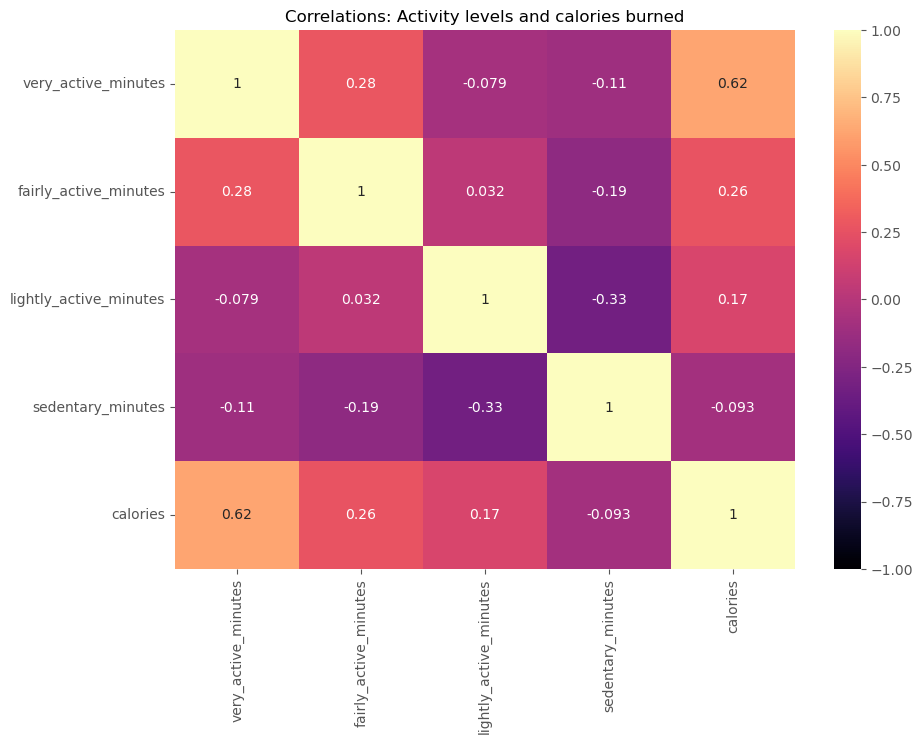

In [82]:
# Ploting a heatmap showing correlations in daily activity dataset
data_heat = daily_activity_time_filtered[['very_active_minutes', 'fairly_active_minutes', 'lightly_active_minutes', 'sedentary_minutes', 'calories']]
plt.figure(figsize=(10,7))
ax =sns.heatmap(data_heat.corr(), annot=True, cmap='magma', vmin=-1, vmax=1) 

ax.set_title('Correlations: Activity levels and calories burned', size = 12)

plt.show()

The more active state, the more calories burned. The strongest correlation(r = 0.62) is found at very active minutes.

**Overview Findings:**


1. Only 8 out of 33 users (24%) logged their weight data, and only two out of these logged throughout the whole month. The user's BMI ranged from  21.5 (normal) to 47.5 (obese), with the median of users being in the upper scale of what is considered normal BMI. No noticable weight loss or gain were obeserved among those who tracked their weight. 

2. Daily activity was tracked on average 20 out of 24 hours a day. 

1. The mean number of steps a day for the users were 8407 steps, above the threshold of minimum recommended steps at 7500, but below the recommendation of 10.000 steps for great fitness, which 21% of the users reached. The greatest number of steps were meassured on Saturdays and Tuesdays, and the least on Sundays and Fridays.

2. Most of the activity seems to be done by foot, and the highest number of steps were recorded at a higher speed (less total activity time pr step).

3. Sleep was recorded for 24 users, whereof 15 tracked their sleep for 15 days or more. In total, the 24 users tracked aprox. 19 days of their sleep.

3. The users reached on average the minimum recommended time of sleep at 7 hours a night. However, the average for Tuesdays and Thursdays were less than 7 hours. Sundays were the weekday were the users slept the most, at 8.7 hours on average. 

4. There is a week negative correlation between total hours sleep a nigth and total steps a day.

5. There is a moderate negative correlation between total hours asleep and number of sedentary hours; the more hours slept, the less sedentary hours on average.
- Not too many steps and not too many sedetary hours seems to be best for improving sleep.

6. The higher level of activity of user, the more calories burned on average.

### User segmentation analysis (based on average amount of steps a day)

**User-group segmentation:**

Sedentary group : < 5000 steps a day


Fairly active group: 5000 - 7999 steps a day


Moderately active: 8000 - 10.999 steps a day


Very active: > 11.000 steps a day

**NB! Very small sample groups, segmentation analysis for demonstration, and finding potential patterns to be investigated further.**

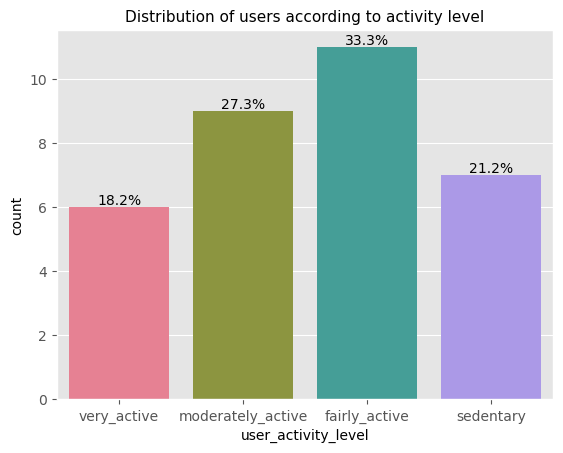

In [83]:
# Visualize number of user which tracked daily pr.activity category
sorted_categories = ['very_active', 'moderately_active', 'fairly_active', 'sedentary']
# Remove duplicates to have one entry per 
unique_users_activity = daily_activity_filtered.drop_duplicates(subset=['id', 'user_activity_level'])

# Add a custom color palette 
palette_custom = sns.color_palette("husl", len(sorted_categories))

# Plot bars
ax = sns.countplot(data=unique_users_activity, x='user_activity_level', palette=palette_custom, order=sorted_categories)
ax.set_title('Distribution of users according to activity level', size = 11)

# # Add percentages
total = len(unique_users_activity['id'].unique()) # Calculate total number of unique users
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'  # Calculate percentage
    x = p.get_x() + p.get_width() / 2  # Place text
    y = p.get_height()  
    ax.text(x, y, percentage, ha='center', va='bottom', fontsize=10)  

plt.show()


In [84]:
# Find percentage of users with more than 10.000 steps a day. 
average_steps_per_user = daily_activity_filtered.groupby('id')['total_steps'].mean()

# Filter to find users with more than 10,000 steps
users_above_10000 = average_steps_per_user[average_steps_per_user > 10000]
print('Percentage of users reaching an average of 10 000 steps a day:', 100/33 *(users_above_10000.count()))

Percentage of users reaching an average of 10 000 steps a day: 27.272727272727273


Most of the users fall within the fairly active group with 5000 - 7999 steps a day, followed by the moderately active group, meaning the majority of the users are neither very active nor sedentary. Around 30 percent of the users reached the recomended 10.000 steps a day.

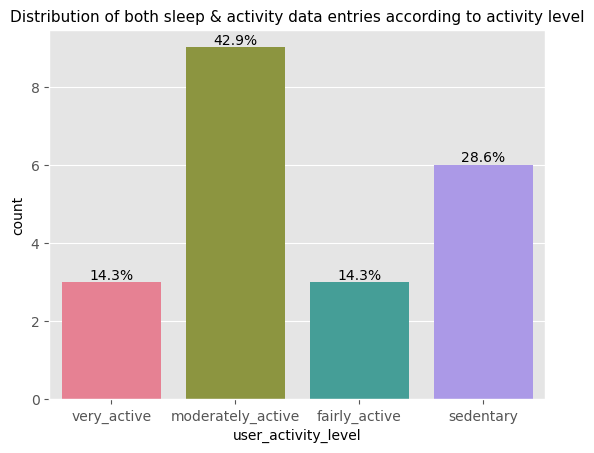

In [85]:
# Users tracked both daily activity and sleep:
#sorted_categories = ['very_active', 'moderately_active', 'fairly_active', 'sedentary']
unique_users_activity2 = activity_sleep_merged.drop_duplicates(subset=['id', 'user_activity_level'])
# Add a custom color palette
palette_custom = sns.color_palette("husl", len(sorted_categories))

# Plot bars
ax = sns.countplot(data=unique_users_activity2, x='user_activity_level', palette=palette_custom, order=sorted_categories)
ax.set_title('Distribution of both sleep & activity data entries according to activity level', size=11)

# Add percentages
total = len(unique_users_activity2)  # Calculate total number of entries
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'  # Calculate percentage
    x = p.get_x() + p.get_width() / 2  # Place text
    y = p.get_height()
    ax.text(x, y, percentage, ha='center', va='bottom', fontsize=10)  # Add text to the bars

plt.show()


All the users in the moderately active group were plotting both their activity and sleep data, while the fairly active group wich had the highest perentage tracking their daily activity, had the fewest users plottig their sleep data. 

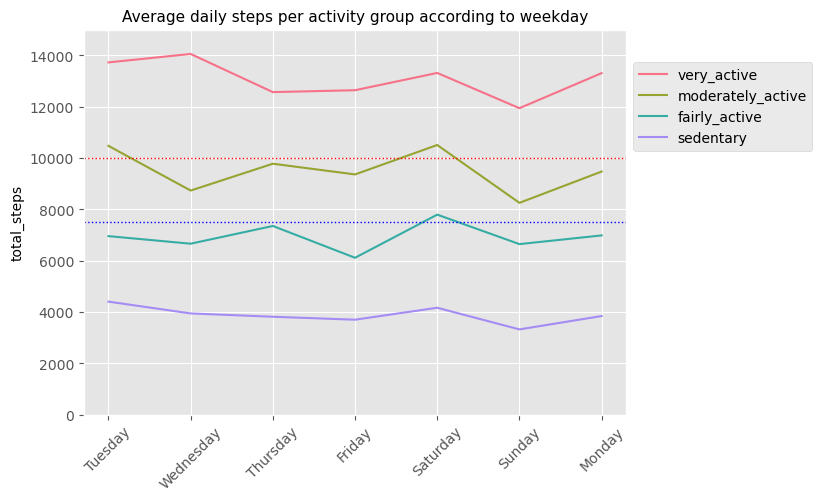

In [86]:
# Visualize avaerage amount of steps per activity group according to weekday
fig, ax1= plt.subplots(figsize=(7, 5))
ax1 = sns.lineplot(data= daily_activity_filtered, x="day_of_week_name", y = "total_steps", ax = ax1,errorbar=None, hue ='user_activity_level', palette = palette_custom, hue_order=sorted_categories )

# Custom
ax1.set_ylim(bottom=0)
ax1.set_ylim(top=15000)
ax1.axhline(10000, color='red', linewidth=1, linestyle = ':')
ax1.axhline(7500, color='blue', linewidth=1, linestyle = ':')
ax1.set_title('Average daily steps per activity group according to weekday', size = 11)
plt.xticks(rotation = 45)
plt.xlabel('')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.show()

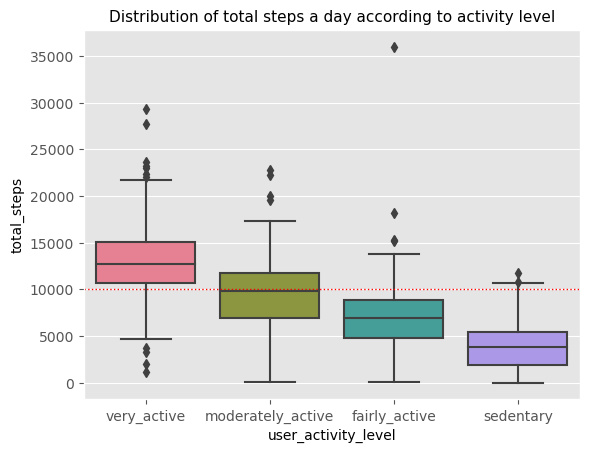

In [87]:
# Visualize step distribution of the tracked data according to users given activity levels
ax = sns.boxplot(data = daily_activity_filtered, x = 'user_activity_level', y = 'total_steps', palette = palette_custom, order=sorted_categories)
ax.axhline(10000, color='red', linewidth=1, linestyle = ':')
ax.set_title('Distribution of total steps a day according to activity level', size = 11)
plt.show()

In [88]:
# Check mean amount of daily steps per group
mean_steps = daily_activity_filtered['total_steps'].groupby(daily_activity_filtered['user_activity_level']).mean()
print(mean_steps)

user_activity_level
fairly_active         6916.290323
moderately_active     9518.831967
sedentary             3894.503311
very_active          13103.477273
Name: total_steps, dtype: float64


All the activity groups reached a peak in number of average steps on Saturdays, and a dip on Sundays. The very active group was consistently on average at or above 12.000 steps per weekday, while the moderately active group reached 10.000 steps on Tuesdays and Saturdays, but was consistantly above 7500 steps per weekday, which is the lower amount of recommended steps a day. The sedentary group was far below the lower amount of recommended steps on all weekdays, while the fairly active group was just below the lower recommendation.

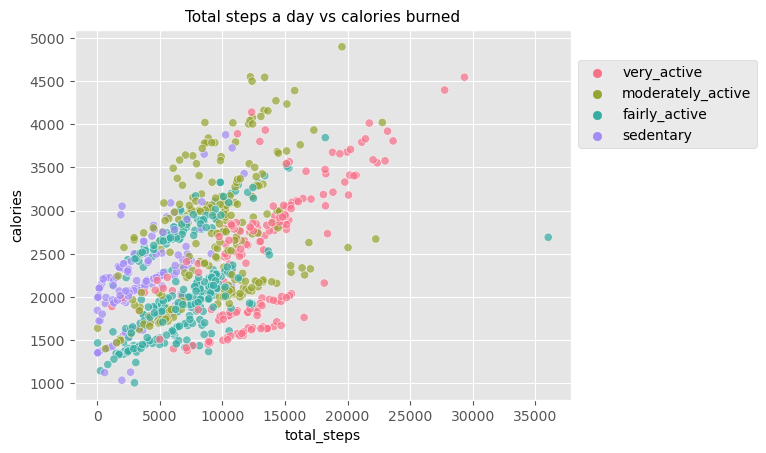

In [89]:
# Plot totals steps taken a day vs. calories burned. Color by activity level
ax = sns.scatterplot(daily_activity_filtered, x = 'total_steps',y = 'calories', alpha = 0.7,hue = 'user_activity_level', palette = palette_custom, hue_order=sorted_categories)
plt.title('Total steps a day vs calories burned', size = 11)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.show()

In [90]:
# Check mean amount  of calories burned per group
mean_calories = daily_activity_filtered['calories'].groupby(daily_activity_filtered['user_activity_level']).mean()
print(mean_calories)

user_activity_level
fairly_active        2127.032258
moderately_active    2740.889344
sedentary            2120.139073
very_active          2507.335227
Name: calories, dtype: float64


The moderately active group burned the most calories on average, followed by the fairly active group. The fairly active and the sedentary group burned the least amount on average.

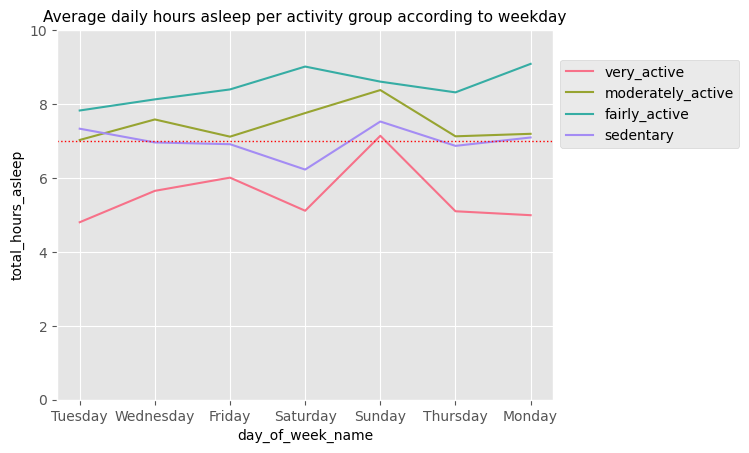

In [91]:
# Visualize average hours a sleep per activity group according to weekday
ax = sns.lineplot(data= activity_sleep_merged, y="total_hours_asleep", x = "day_of_week_name", hue = "user_activity_level", hue_order=sorted_categories, errorbar = None, palette= palette_custom)
ax.set_ylim(top=10)
ax.set_ylim(bottom=0)
ax.axhline(7, color='red', linewidth=1, linestyle = ':')
ax.set_title('Average daily hours asleep per activity group according to weekday', size = 11)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.show()

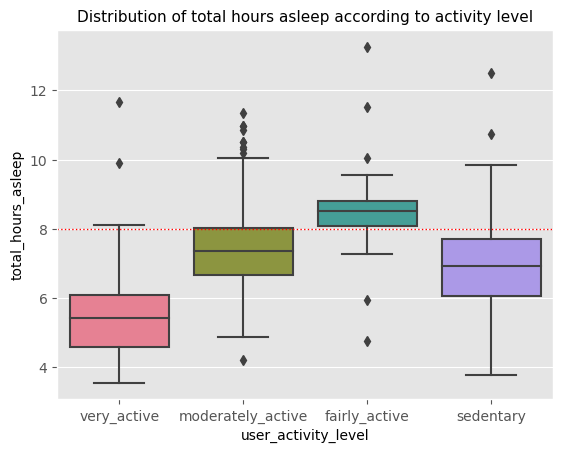

In [92]:
# Visualize step distribution of the tracked data according to users given activity levels
ax = sns.boxplot(data = activity_sleep_merged, x = 'user_activity_level', y = 'total_hours_asleep', palette = palette_custom, order = sorted_categories)
ax.axhline(8, color='red', linewidth=1, linestyle = ':')
ax.set_title('Distribution of total hours asleep according to activity level', size = 11)
plt.show()

In [93]:
# Check mean amount  of sleep hours per group
mean_calories = activity_sleep_merged['total_hours_asleep'].groupby(activity_sleep_merged['user_activity_level']).mean()
print(mean_calories)


user_activity_level
fairly_active        8.490881
moderately_active    7.451800
sedentary            7.009821
very_active          5.522840
Name: total_hours_asleep, dtype: float64


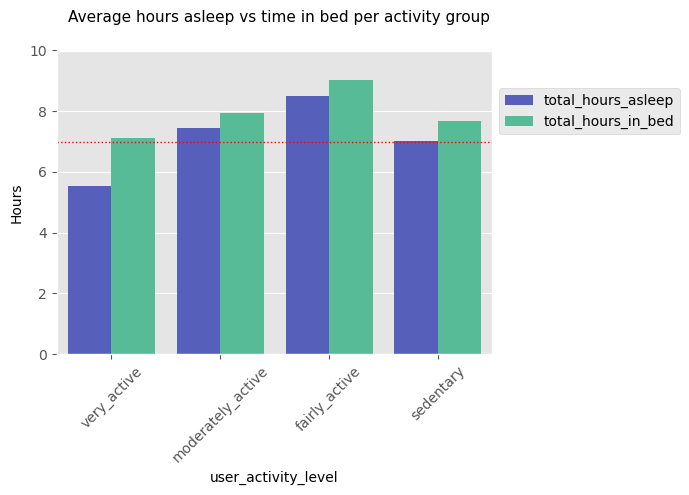

In [94]:
# Visualize average hours a sleep vs average hours in bed per activity group
# Calculate average levels
activity_trends = activity_sleep_merged.groupby('user_activity_level')[['total_hours_asleep', 'total_hours_in_bed']].mean().reset_index()


palette_custom2 = ['#4553cc', '#45cc9a']
# Melting the df from "marix" to long format
activity_trends_melted = pd.melt(activity_trends, id_vars='user_activity_level', value_vars=['total_hours_asleep', 'total_hours_in_bed'], var_name='Measure', value_name='Hours')

# Creating the bar plots
fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(data=activity_trends_melted, x='user_activity_level', y='Hours', hue='Measure', ax=ax, palette = palette_custom2, order =sorted_categories)

# Custom
ax.set_ylim(0, 10)
ax.legend(title='Sleep Measure')
plt.xticks(rotation=45) 
plt.tight_layout()
ax.axhline(7, color='red', linewidth=1, linestyle = ':') # Adding a red line at the recommended 8 hours asleep
fig.suptitle('Average hours asleep vs time in bed per activity group                           ', size = 11)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.8))   
plt.tight_layout()


plt.show()

The very active group had on average the least number of sleep hours a night, at around 5 and a half hour, and only reaching the recommended 7 hours on Sundays. Following the very active group was the sedentary group, which on average reached 7 hours a night, but were closer to 6 hours on Saturdays. The fairly active group had the most sleep hours a nigh on average, at 8 and a half hour per night, with the most sleep on Saturdays and Mondays. The moderately active group reached an average of 7 and a half hour. Overall, the fairly to moderate activity groups had the most hours of sleep, while the very active group's sleep was unsufficient. The very active group also spent the least total hours in bed, at approx. 7 hours a day, and spent the greatest amount of time in bed without sleep. 

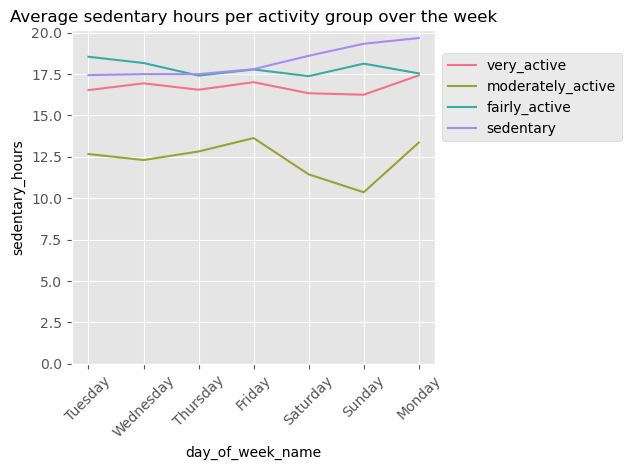

In [98]:
# Visualize average sedentary hours per weekday per activity group
ax = sns.lineplot(data= daily_activity_filtered , y="sedentary_hours", x = "day_of_week_name", hue = "user_activity_level", errorbar = None, palette = palette_custom, hue_order = sorted_categories)
# Custom
ax.set_ylim(bottom=0)
plt.xticks(rotation = 45)
plt.title('Average sedentary hours per activity group over the week', size = 12)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.tight_layout()
plt.show()

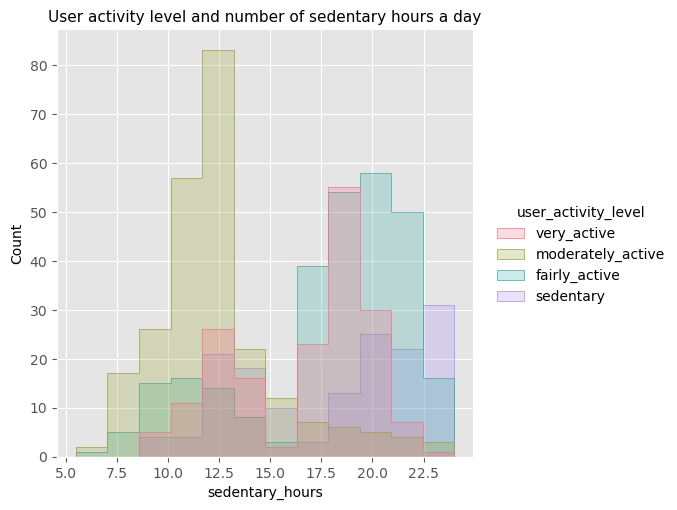

In [112]:
# Investigate bimodal sedentary hours distribution and user activity level
sns.displot(daily_activity_filtered, x="sedentary_hours", hue="user_activity_level", element="step", palette = palette_custom,  hue_order = sorted_categories)
plt.title('User activity level and number of sedentary hours a day', size = 11)
plt.show()

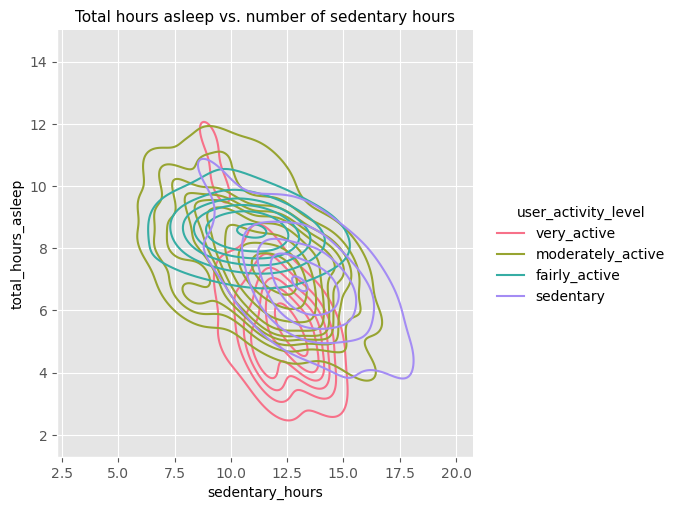

In [123]:
# Investigate if amount of sedentary hours correlates with hours of sleep
sns.displot(activity_sleep_merged , x="sedentary_hours", y="total_hours_asleep", kind="kde", hue="user_activity_level", palette = palette_custom, hue_order = sorted_categories)
plt.title('Total hours asleep vs. number of sedentary hours', size = 11)

plt.show()

The highly active, the fairly active and the sedentary groups display two "peaks" among the users when it comes to average count of daily sedentary hours, with the majority of users spending more hours sedentary, than less sedentary. Within the very active group, the most sedentary users are sleeping less hours a night. This pattern can also be observed in the sedentary and the moderatley active group. In the fairly active group, we do not observe this (NB!very small sample group). The moderately active group spend on average the least amount of time sedentary, whereof the least during the weekdays. 

In [124]:
# Analyze according to distance intensity
daily_distance_group = daily_activity_filtered[['very_active_distance', 'moderately_active_distance', 'light_active_distance',  'user_activity_level']]

In [125]:
# Group by activity level
grouped_distances = daily_distance_group.groupby('user_activity_level')

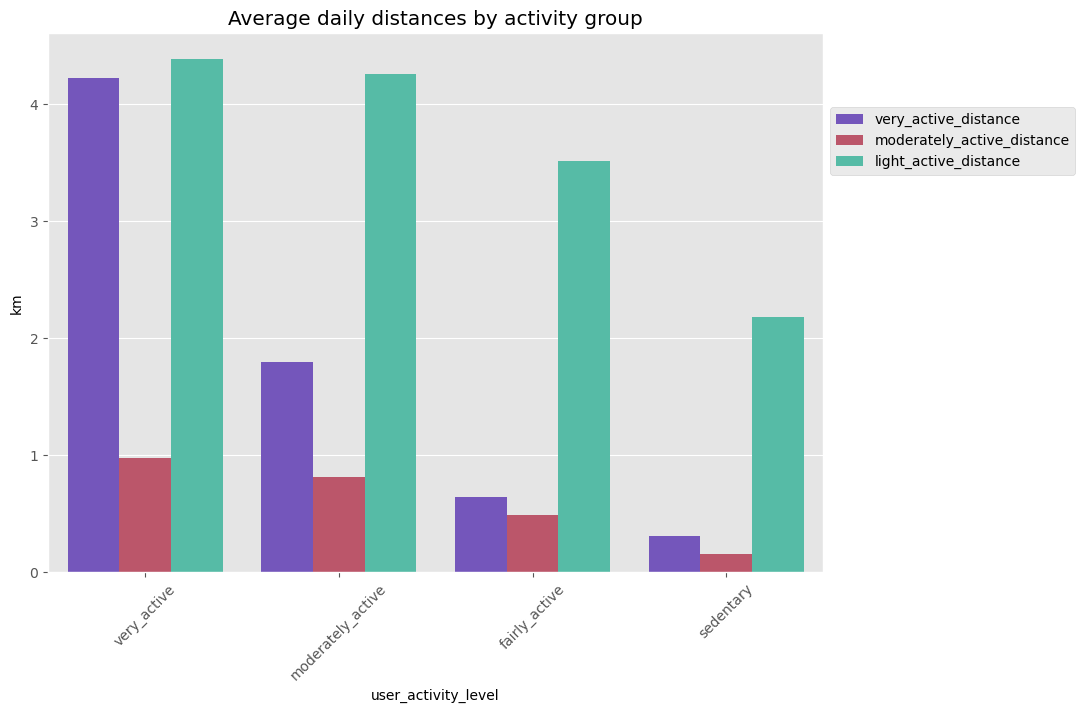

In [126]:
# Find the mean distances per group
grouped_distances = daily_distance_group.groupby('user_activity_level').mean()


# Melt the df
melted_data = daily_distance_group.melt(id_vars=['user_activity_level'], var_name='activity_type', value_name='km')

# Plot
plt.figure(figsize=(10, 7))
sns.barplot(data=melted_data, x='user_activity_level', y='km', hue='activity_type', palette = palette_custom1, errorbar = None, order=sorted_categories)
# Custom
plt.title('Average daily distances by activity group')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.8))
plt.xticks(rotation=45)

plt.show()

In [127]:
daily_intensities = daily_activity[['very_active_minutes', 'fairly_active_minutes', 'lightly_active_minutes', 'sedentary_minutes']]

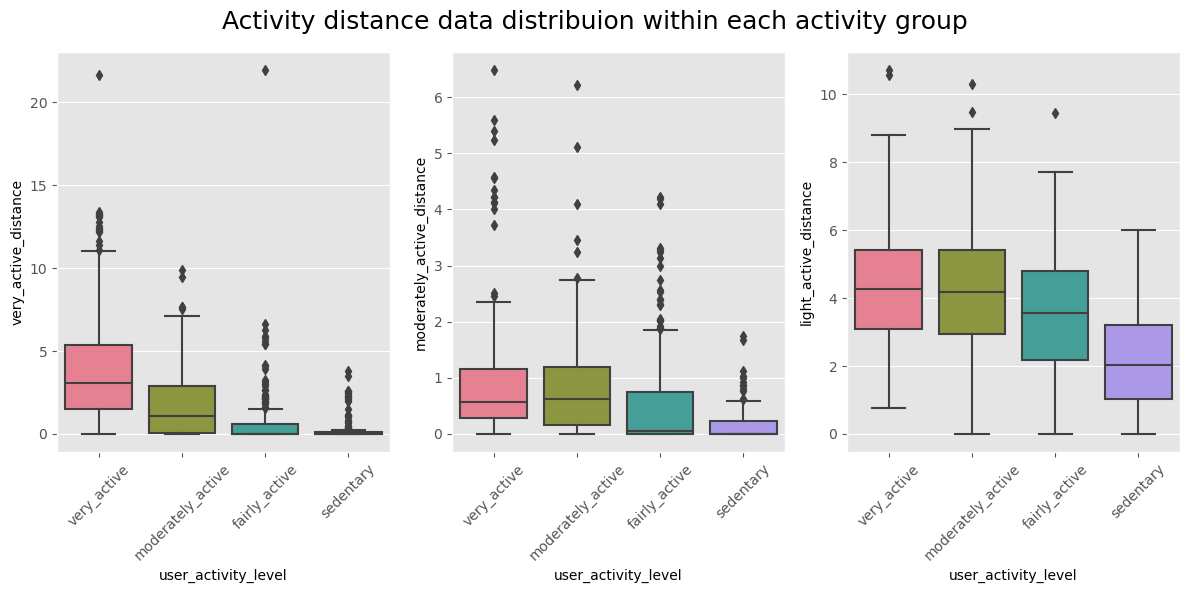

In [128]:
# Take a better look at data distrbution amoung the users in each activity group
fig, axs =fig, axs = plt.subplots(1,3, figsize =(12,6))

ax1 = sns.boxplot(x='user_activity_level', y='very_active_distance', data=daily_activity_filtered, ax=axs[0], palette = palette_custom, order = sorted_categories)
ax2 = sns.boxplot(x='user_activity_level', y='moderately_active_distance', data=daily_activity_filtered, ax=axs[1], palette = palette_custom, order = sorted_categories)
ax3 = sns.boxplot(x='user_activity_level', y='light_active_distance', data=daily_activity_filtered, ax=axs[2], palette = palette_custom, order = sorted_categories)

ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='x', rotation=45)


fig.suptitle('Activity distance data distribuion within each activity group', size = 18)

plt.tight_layout()
plt.show()

The very active group differs greatly from the other groups when it comes to daily distance with very active pace, and have around double the distance at high pace compared to the moderately active group. The groups have otherwise similar profiles   when it comes to average daily distance with moderate pace and light pace. The fairly active and the sedentary group had less disances covered in all pace categories. 

**Main findings,segmentation analysis:**
- The majority of the users are neither very active nor sedentary. 
- All the activity groups reached a peak in number of average steps on Saturdays, and a dip on Sundays. The very active group was consistently on average at or above 12.000 steps per weekday, while the moderately active was consistantly above 7500 steps per weekday, which is the lower amount of recommended steps a day. The sedentary group was far below the lower amount of recommended steps on all weekdays, while the fairly active group was just below the lower recommendation.
- The moderately active group burned the most calories on average, followed by the fairly active group. The fairly active and the sedentary group burned the least amount on average.
- The fairly to moderate activity groups had the most hours of sleep, while the very active groups sleep was unsufficient. 
- The majority of the users spent more than 15 hours a day sedentary, except for in the moderately active group, and users with a higher number of sedentary hours a day had the least hours of sleep. This pattern could possible be connected to the job of the users, where for example more users in the moderate group have an overall less sedentary job (therefor also less sedentary in the weekdays), while the users with more sedentary hours have office jobs, or even homeoffice, which likely affect hourly activity levels and sleep. 
- The very active group differs greatly from the other groups when it comes to daily distance with very active pace, and have around double the distance at high pace compared to the moderately active group. The two groups are otherwise similar when it comes to activity distances. The two other groups are less active overall, with less distances covered. Very active users are not necessary spending less time sedentary, but include more higher level activity in their average day.



**Recommendations:**

- Improve tracking: Users should be recommended and encouraged to use the app/tracker. This could be done by a point system, or a social sharing feature, as well as enlightenment of health benefits of reaching different measurement goals for such as sleep, weight and steps. 

- Activity encouragment: The sedentary users and the fairly active users should be encouraged to reach an average of 7500 steps a day (minimum recommended steps), while the moderately active users should be encouraged to reach 10.000 steps a day for best health benefits. The very active users on the other hand should be encouraged to calm down, especially before bedtime in order to improve sleeptime. 

- Calm down stressed users: A meditation feature can be added for users having difficult calming down to improve sleep, and healthy food recipes can be suggested for users tracking weight with a specific loss or gain goal in mind, or for improving energy etc.

- Reduce sedentay hours and improve activity: High activity showed the greatest correlation to amount of calories burned, and contributed the highest amount of daily steps. Users which are struggling to reach their weight and step goals can be encouraged to include short weekly workouts with  higher activity levels, while users spending a lot of their day sedentary, can be encouraged to take short moderate walks to interrupt long hours of being sedentary and thereby reap health benefits and get outside which also improves sleep. 

- Encourage following a personalized routine: Encourage setting and following a personalized healthy routine for bedtime, food and exercise. Forecasting of specific future health benefits if following the routine to keep motivation up.
